## Some data visualization

In [1]:
# packages
import os
import pandas as pd
import math
from scipy import io
import numpy as np
from numpy import squeeze
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

In [2]:
allData = pd.read_csv('postKetamineTable.csv')

In [3]:
# Remove any rows with nans
allDataNN = pd.DataFrame.dropna(allData,'index')
print("After Drop NaN")
print("num_rows =",len(allDataNN))

After Drop NaN
num_rows = 4995


In [4]:
ketBool = allDataNN['ketamineAdministered']
timeSinceKetamine = allDataNN['timeSinceKetamine']
sessionDate = allDataNN['sessionDate']
trialNum = allDataNN['trialNum']
VizData = allDataNN[['correlationScore', 'lickAccuracy',
       'lickNumber', 'avgFR', 'avgSingleCellVariance',
       'varianceFR', 'avgTrialSpeed', 'varianceSpeed']]

In [5]:
X, X_test, y, y_test = train_test_split(VizData,timeSinceKetamine.values.ravel(), test_size=0.2)

In [6]:
df_train = pd.DataFrame(X)
df_train['timeSinceKetamine'] = y
df_vis = df_train.copy()

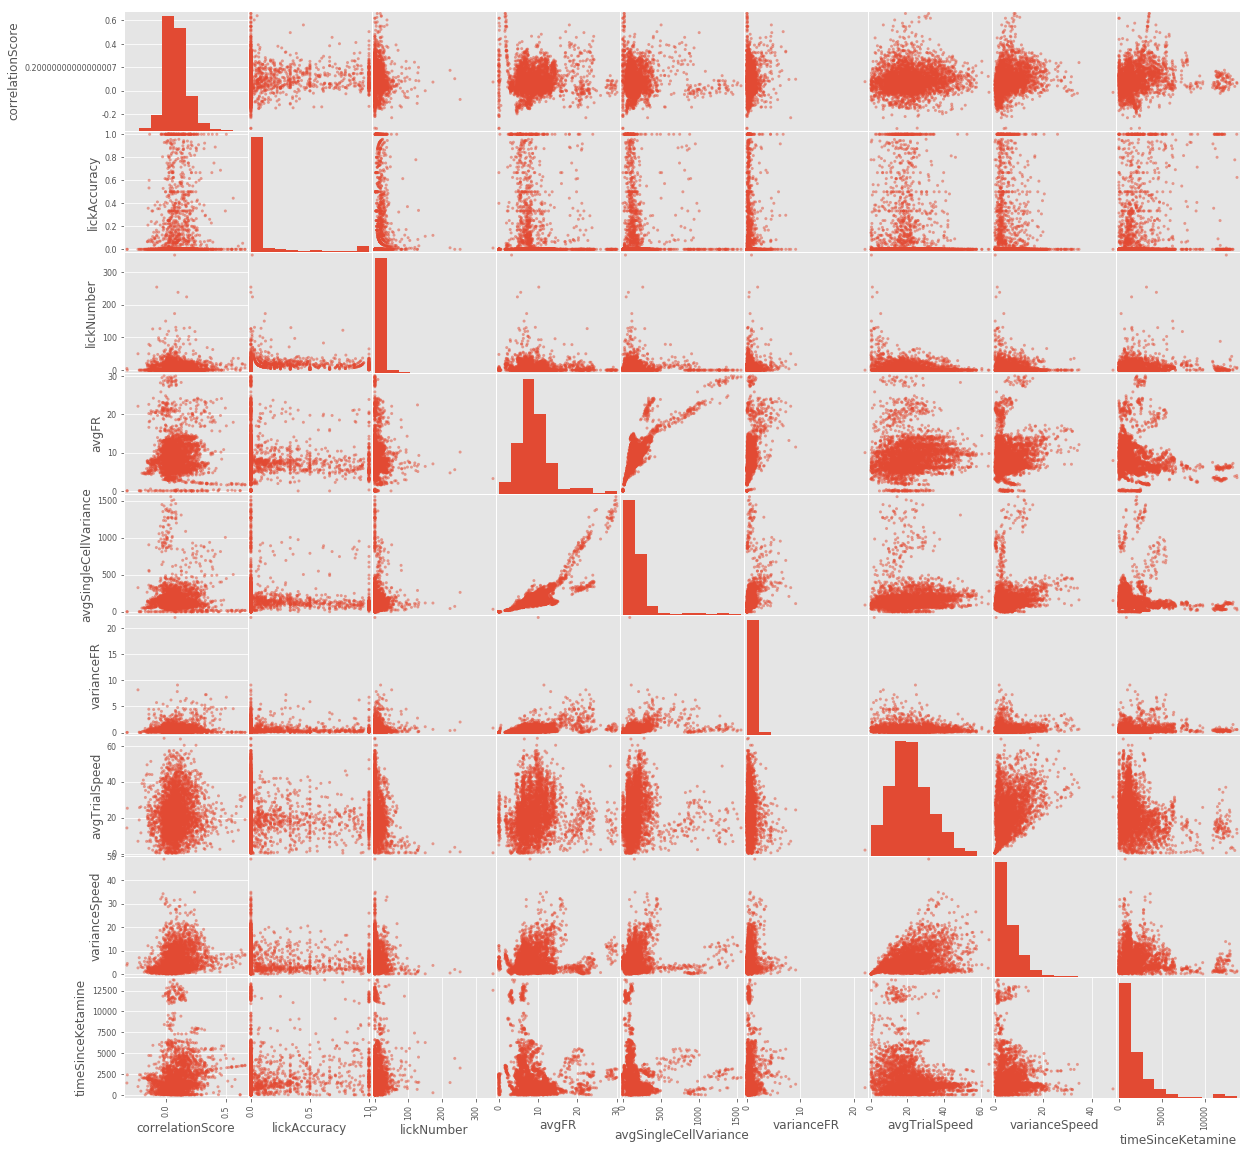

In [7]:
axes = pd.plotting.scatter_matrix(df_vis, figsize=(20,20))
plt.savefig('scatter_matrix.png')

In [11]:
max(y)

13781.8

In [12]:
min(y)

8.86000000000001

In [14]:
mean_y = np.mean(y)

In [22]:
y_pred = mean_y*np.ones(np.shape(y))

In [24]:
rmse = np.sqrt(mean_squared_error(y_pred,y))

In [25]:
rmse

2207.247738459438

In [26]:
rmse_scaled = rmse/(max(y)-min(y))

In [27]:
rmse_scaled

0.16025973673445454

In [29]:
r2_score(y,y_pred)

0.0